## Exercise 1

In [25]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    from urllib.request import urlretrieve

    urlretrieve("https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py", "thinkdsp.py")

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate, Wave, zero_pad
import scipy.signal
import pandas as pd

PI2 = np.pi * 2

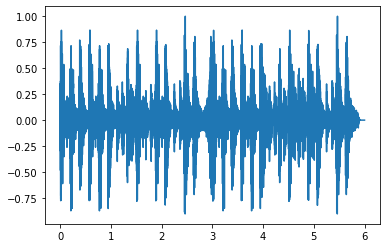

In [27]:
from thinkdsp import read_wave

wave = read_wave('Sounds/263868__kevcio__amen-break-a-160-bpm.wav')
wave.normalize()
wave.plot()

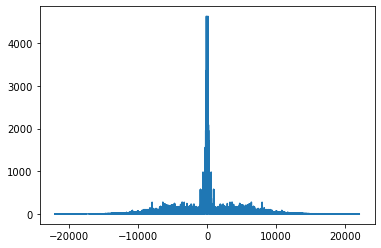

In [28]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

In [29]:
factor = 3
framerate = wave.framerate / factor
cutoff = framerate / 2 - 1

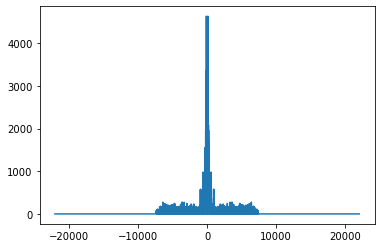

In [30]:
spectrum.low_pass(cutoff)
spectrum.plot()

In [31]:
from thinkdsp import Wave

def sample(wave, factor):
    ys = np.zeros(len(wave))
    ys[::factor] = np.real(wave.ys[::factor])
    return Wave(ys, framerate=wave.framerate)

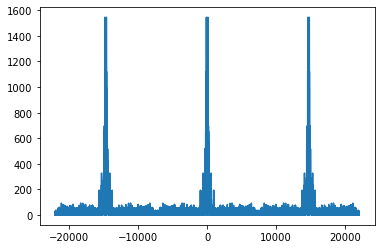

In [32]:
filtered = spectrum.make_wave()
sampled = sample(filtered, factor)
sampled_spectrum = sampled.make_spectrum(full=True)
sampled_spectrum.plot()

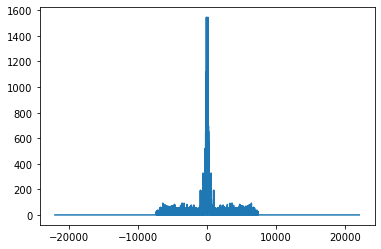

In [33]:
sampled_spectrum.low_pass(cutoff)
sampled_spectrum.plot()

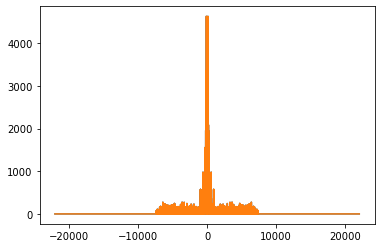

In [34]:
sampled_spectrum.scale(factor)
spectrum.plot()
sampled_spectrum.plot()

In [35]:
spectrum.max_diff(sampled_spectrum)

1.8189894035458565e-12

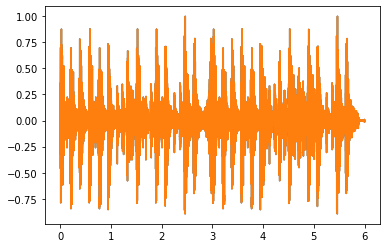

In [36]:
interpolated = sampled_spectrum.make_wave()
filtered.plot()
interpolated.plot()